# Explore Weather

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

# 🌦️ Weather Data Exploration – Minas Gerais (2006–2023)

## 📚 Table of Contents
- [1. Data Dictionary](#data-dictionary)
- [2. Dataset Overview](#dataset-overview)
- [3. Univariate Analysis](#univariate-analysis)
- [4. Grouped Weather Charts](#grouped-weather-charts)
- [5. Range Visualizations](#range-visualizations)
- [6. Summary & Recommendations](#summary--recommendations)

---

## 📖 Data Dictionary

This dataset describes weather outcomes from January to May for each year.

| Column        | Description                                        |
|---------------|----------------------------------------------------|
| year          | Year of observation                                |
| rain_max      | Average max rainfall (mm)                          |
| temp_avg      | Average temperature (°C)                           |
| temp_max      | Max temperature (°C)                               |
| temp_min      | Min temperature (°C)                               |
| hum_max       | Max humidity (%)                                   |
| hum_min       | Min humidity (%)                                   |
| wind_max      | Max wind speed (m/s)                               |
| wind_avg      | Average wind speed (m/s)                           |
| subdivision   | Region (Minas Gerais only)                         |


## 📚 Data Dictionary

- **year:** Year on which metrics were calculated.
- **rain_max:** Average maximum millimeters of rain.
- **temp_avg:** Average temperature in Celsius.
- **temp_max:** Average maximum temperature in Celsius.
- **temp_min:** Average minimum temperature in Celsius.
- **hum_max:** Average maximum humidity in percentage.
- **hum_min:** Average minimum humidity in percentage.
- **wind_max:** Average maximum wind speed in meters per second.
- **wind_avg:** Average wind speed in meters per second.
- **subdivision:** Name of Brazilian sub-division (all should be Minas Gerais).

## 📋 Table of Contents

- [Exploratory Data Analysis (EDA)](#eda)
  - [Univariate Analysis: Average Temperature](#temp-avg)
  - [Univariate Analysis: Minimum Humidity](#hum-min)
  - [Univariate Analysis: Average Wind Speed](#wind-avg)
  - [Yearly Maximum Record Rainfall](#rain-max)
- [Reflections](#reflections)
- [Conclusion](#conclusion)

In [5]:
import pandas as pd # for data manipulation using DataFrames
import numpy as np # for numerical operations
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
# Import Exploratory Libraries
import matplotlib.ticker as xlocator # for axis formatting customizing axis tick locations and formatting in matplotlib plots
import plotly.express as px # for interactive plots  (especially scatter, line, and map plots)
from scipy.stats import pearsonr # for calculating the Pearson correlation coefficient between two datasets                    
import math # for mathematical operations not found in numpy or native python mathematical functions like log, sqrt, floor, ceil, et
import geopandas as gpd # For working with geospatial data in pandas-like DataFrames
import geoplot.crs as gcrs  # Coordinate reference systems used with geoplot for geospatial plotting
import geoplot as gplt # High-level geospatial plotting built on top of geopandas and matplotlib
import cartopy.crs as ccrs #For advanced cartographic projections and coordinate transformations
from pypalettes import add_cmap # Allows custom color maps for plotting (useful for themed or branded maps)
from pyfonts import load_google_font # To import and use Google Fonts in matplotlib visualizations
import unicodedata #for normalizing or inspecting Unicode text data (e.g., removing accents or categorizing characters)


In [6]:
# import data
weather1 = pd.read_csv("../data/weather/weather_data1.csv")
weather2 = pd.read_csv("../data/weather/weather_data2.csv")

In [7]:
weather1

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais
5,2011,2.601786,20.959536,27.735714,16.318132,96.060440,49.252747,8.974176,1.557709,Minas Gerais
6,2012,2.255738,21.030624,28.406011,16.003279,96.060109,46.366120,9.000000,1.483515,Minas Gerais
7,2013,3.079121,21.088660,27.976923,16.386813,96.802198,49.390110,8.749451,1.459356,Minas Gerais
8,2014,1.617582,21.163462,28.406044,15.684066,96.214286,44.824176,8.429121,1.238874,Minas Gerais


In [8]:
weather2
#type(weather2)

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision
0,2015,2.876923,21.346828,28.487912,16.475275,97.450549,48.406593,8.549451,1.193435,Minas Gerais
1,2016,2.641860,21.630402,28.855233,16.705233,97.587209,47.587209,8.377907,1.158309,Minas Gerais
2,2017,2.052459,21.404627,28.433607,16.409016,97.155738,47.475410,7.484426,0.969464,Minas Gerais
3,2018,3.567568,21.325718,28.659459,16.174324,98.290541,47.047297,8.205405,0.901090,Minas Gerais
4,2019,3.443956,21.733539,29.010989,16.658791,98.115385,48.230769,7.930220,0.905517,Minas Gerais
5,2020,4.545355,20.884335,27.938251,16.321311,98.010929,51.005464,7.730055,0.900751,Minas Gerais
6,2021,2.715385,20.831525,28.626374,15.268681,97.049451,44.824176,7.782418,0.847070,Minas Gerais
7,2022,3.769231,20.704556,28.110440,15.748901,97.351648,48.543956,7.898352,0.929144,Minas Gerais
8,2023,4.106593,21.046566,28.732967,15.908791,98.500000,48.857143,7.793956,0.812202,Minas Gerais


In [9]:
# TODO: concatenate your data files together and save to a new csv file ("../data/weather/weather_data.csv")
weather = pd.concat([weather1, weather2], ignore_index=True)
weather 

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais
5,2011,2.601786,20.959536,27.735714,16.318132,96.060440,49.252747,8.974176,1.557709,Minas Gerais
6,2012,2.255738,21.030624,28.406011,16.003279,96.060109,46.366120,9.000000,1.483515,Minas Gerais
7,2013,3.079121,21.088660,27.976923,16.386813,96.802198,49.390110,8.749451,1.459356,Minas Gerais
8,2014,1.617582,21.163462,28.406044,15.684066,96.214286,44.824176,8.429121,1.238874,Minas Gerais
9,2015,2.876923,21.346828,28.487912,16.475275,97.450549,48.406593,8.549451,1.193435,Minas Gerais


In [10]:
# TODO: view first 5 rows of your data
weather.head()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais


In [11]:
weather.shape

(18, 10)

In [12]:
# TODO: describe your numeric columns 
weather.describe()  

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2014.500000,3.175087,21.285831,28.198312,16.458525,96.502990,48.528039,8.469412,1.286295
std,5.338539,1.190658,0.549483,0.564714,0.891070,2.345644,3.010135,0.611327,0.399773
min,2006.000000,1.617582,20.682400,27.000000,15.268681,87.837500,44.648352,7.484426,0.812202
25%,2010.250000,2.342250,20.975602,27.811486,16.041470,96.079483,47.154325,7.906319,0.911424
50%,2014.500000,2.978022,21.126061,28.406027,16.319722,97.089241,48.450172,8.489286,1.216155
75%,2018.750000,3.718815,21.434377,28.614973,16.459066,97.553044,49.310440,8.946889,1.539160
max,2023.000000,6.670968,23.040999,29.010989,18.753125,98.500000,57.806452,9.706452,2.075207


In [13]:
weather.columns

Index(['year', 'rain_max', 'temp_avg', 'temp_max', 'temp_min', 'hum_max',
       'hum_min', 'wind_max', 'wind_avg', 'subdivision'],
      dtype='object')

In [14]:
# TODO: display the null values in your dataframe 
weather.isnull().sum()

year           0
rain_max       0
temp_avg       0
temp_max       0
temp_min       0
hum_max        0
hum_min        0
wind_max       0
wind_avg       0
subdivision    0
dtype: int64

## 🌬️**Weather Trends in Minas Gerais (2006–2023)**



In [78]:
# TODO: BEGIN YOUR EDA! exploratory data analysis explore_weather.ipynb 




## 🧠Univariate Analysis 

How is average temperature, minimum humidity, and average wind speed changing across the years for Minas Gerais? Is this increasing or decreasing?
Which year had the highest maximum record rainfall?

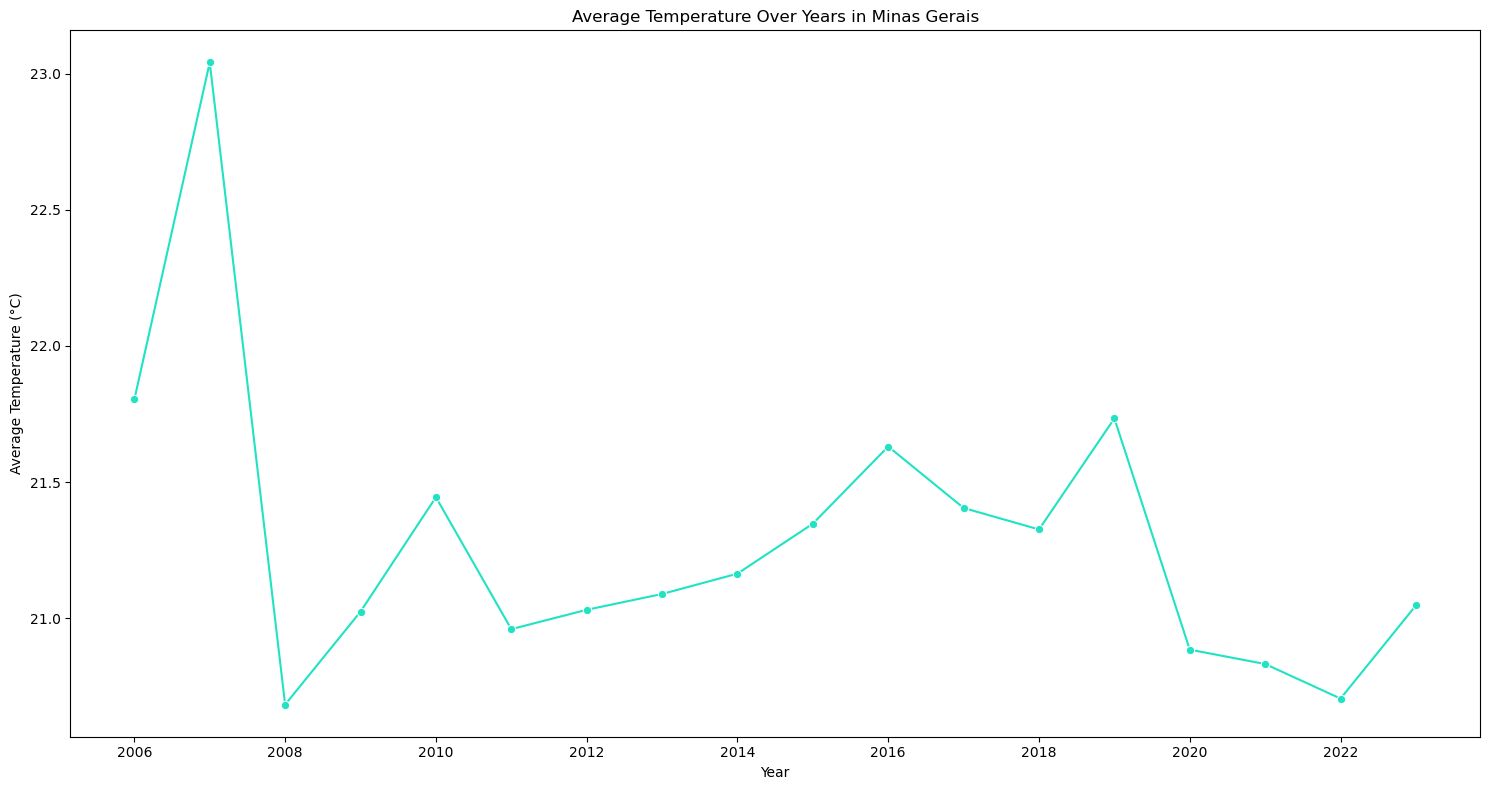

In [41]:
# TODO: average temperature Line Chart
#weather.groupby("year")["temp_avg"].mean().plot(kind="line", marker="p", figsize=(10,6),color="#1FE3C2" )

plt.figure(figsize=(15,8))
sns.lineplot(data=weather, x="year", y="temp_avg", marker='o', color="#1FE3C2")
plt.title("Average Temperature Over Years in Minas Gerais")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.gca().xaxis.set_major_locator(xlocator.MultipleLocator(2))
plt.tight_layout()
plt.show()


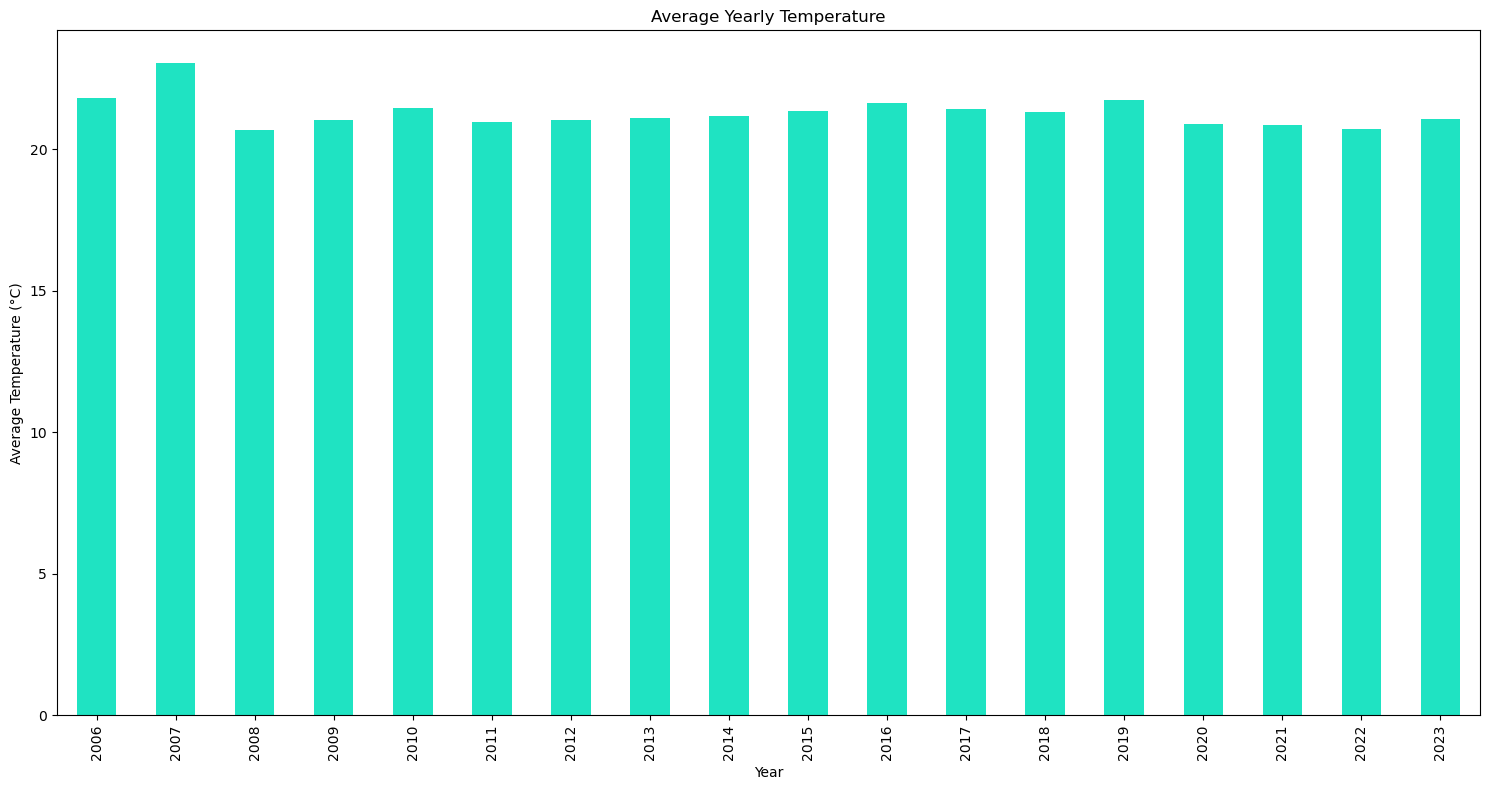

In [50]:
# TODO: average temperature Bar Chart
weather.groupby("year")["temp_avg"].mean().plot(kind="bar", figsize=(15,8), color="#1FE3C2")

plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Average Yearly Temperature")  
plt.tight_layout()

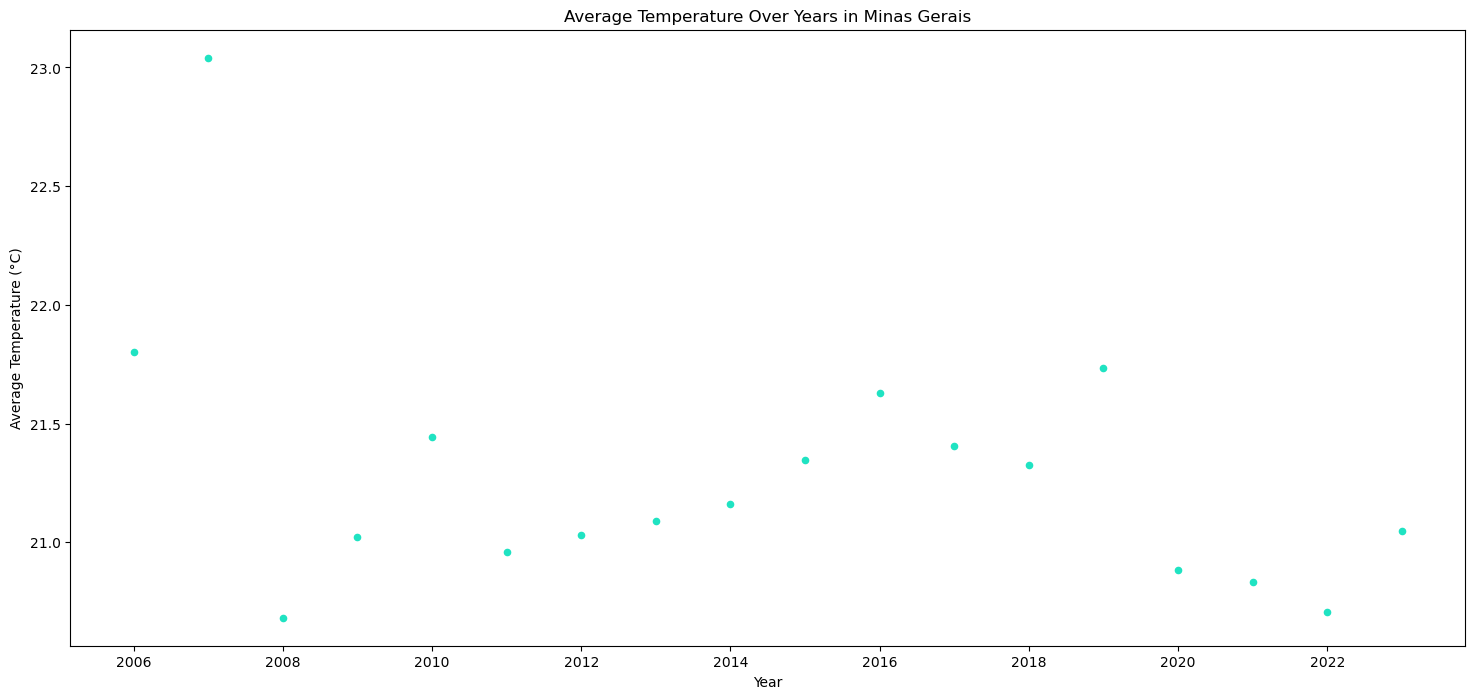

In [ ]:
# average temperature Scatter Plot
weather.plot.scatter(x="year", y="temp_avg", color="#1FE3C2", figsize=(18, 8))
plt.title("Average Temperature Over Years in Minas Gerais")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.gca().xaxis.set_major_locator(xlocator.MultipleLocator(2))
plt.show()



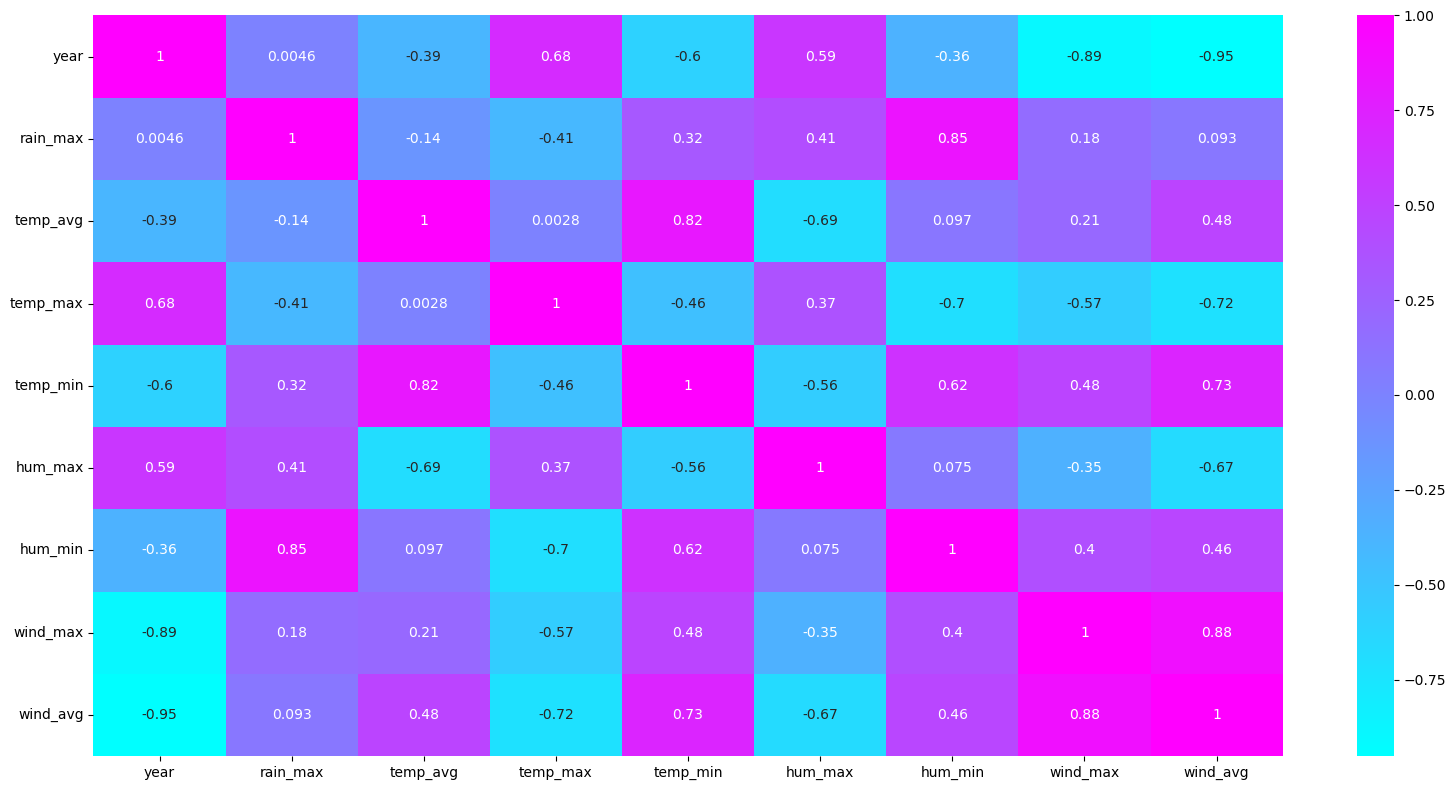

In [32]:
plt.figure(figsize=(16, 8))
numeric_df = weather.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='cool')
plt.tight_layout()

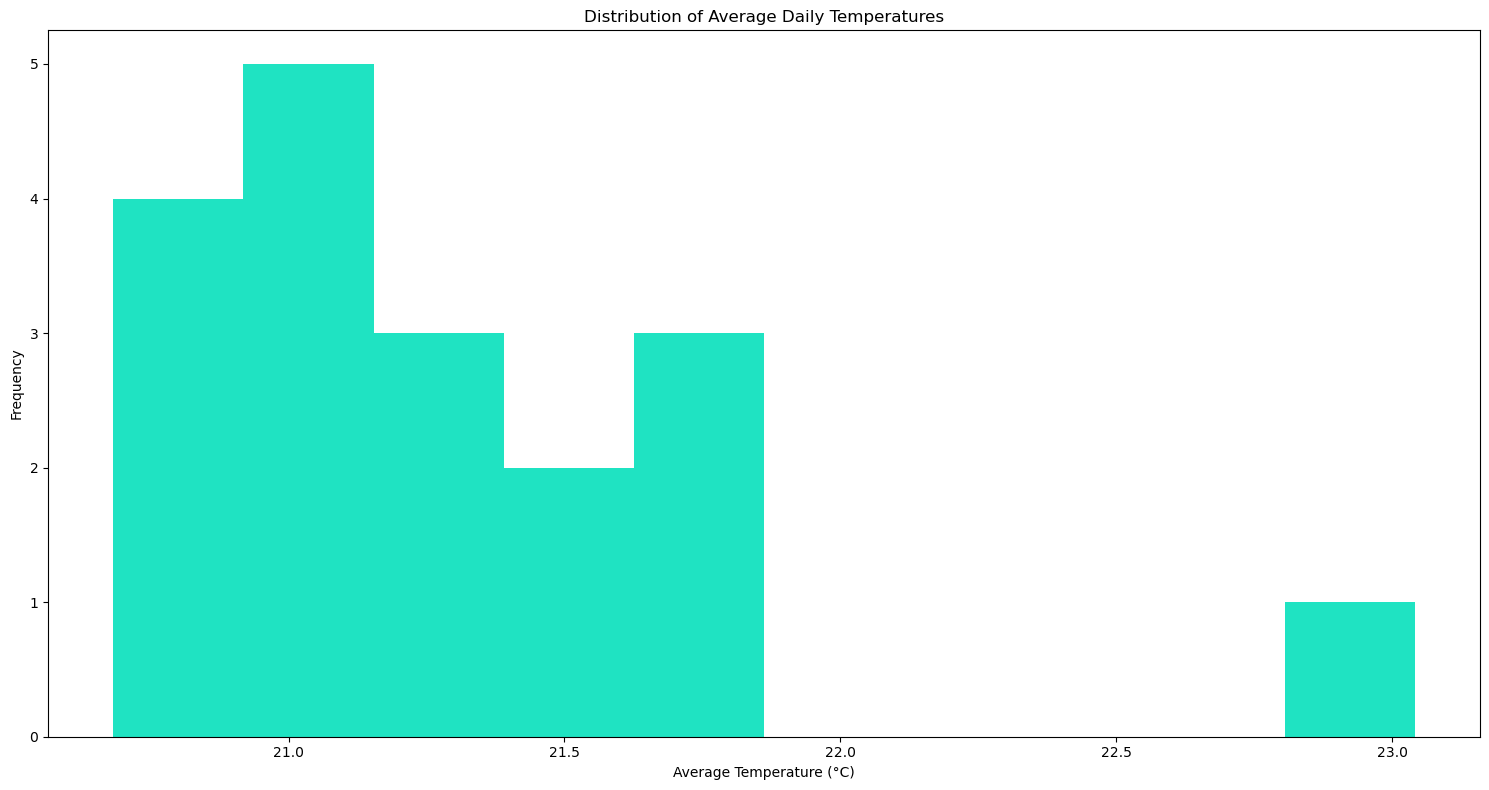

In [ ]:

# average temperature Histogram shows distribution of average daily temperatures with gaps in our data set.
weather["temp_avg"].plot.hist(figsize=(15,8), color="#1FE3C2")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Average Daily Temperatures")
plt.tight_layout()

In [62]:
# average temperature Box Plot


In [65]:
# average temperature Violin Plot


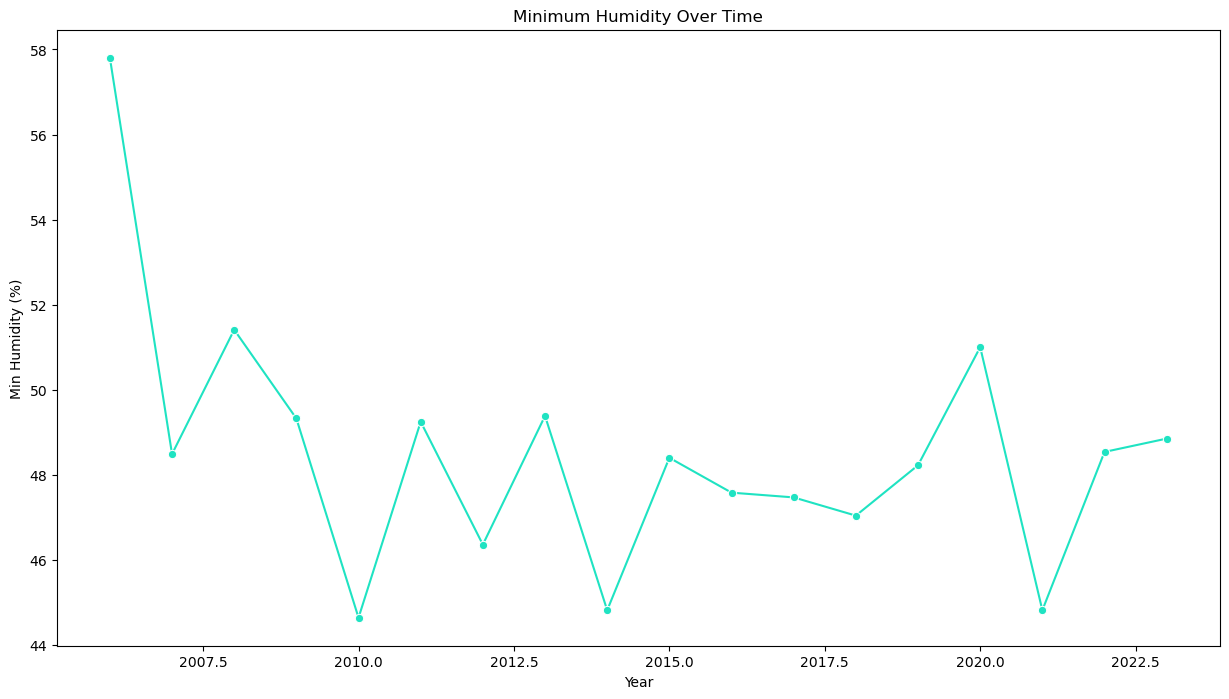

In [67]:
# TODO: minimum humidity Line Plot 
plt.figure(figsize=(15, 8))
sns.lineplot(data=weather, x="year", y="hum_min", marker='o', color="#1FE3C2")
plt.title("Minimum Humidity Over Time")
plt.xlabel("Year")
plt.ylabel("Min Humidity (%)")
plt.show()

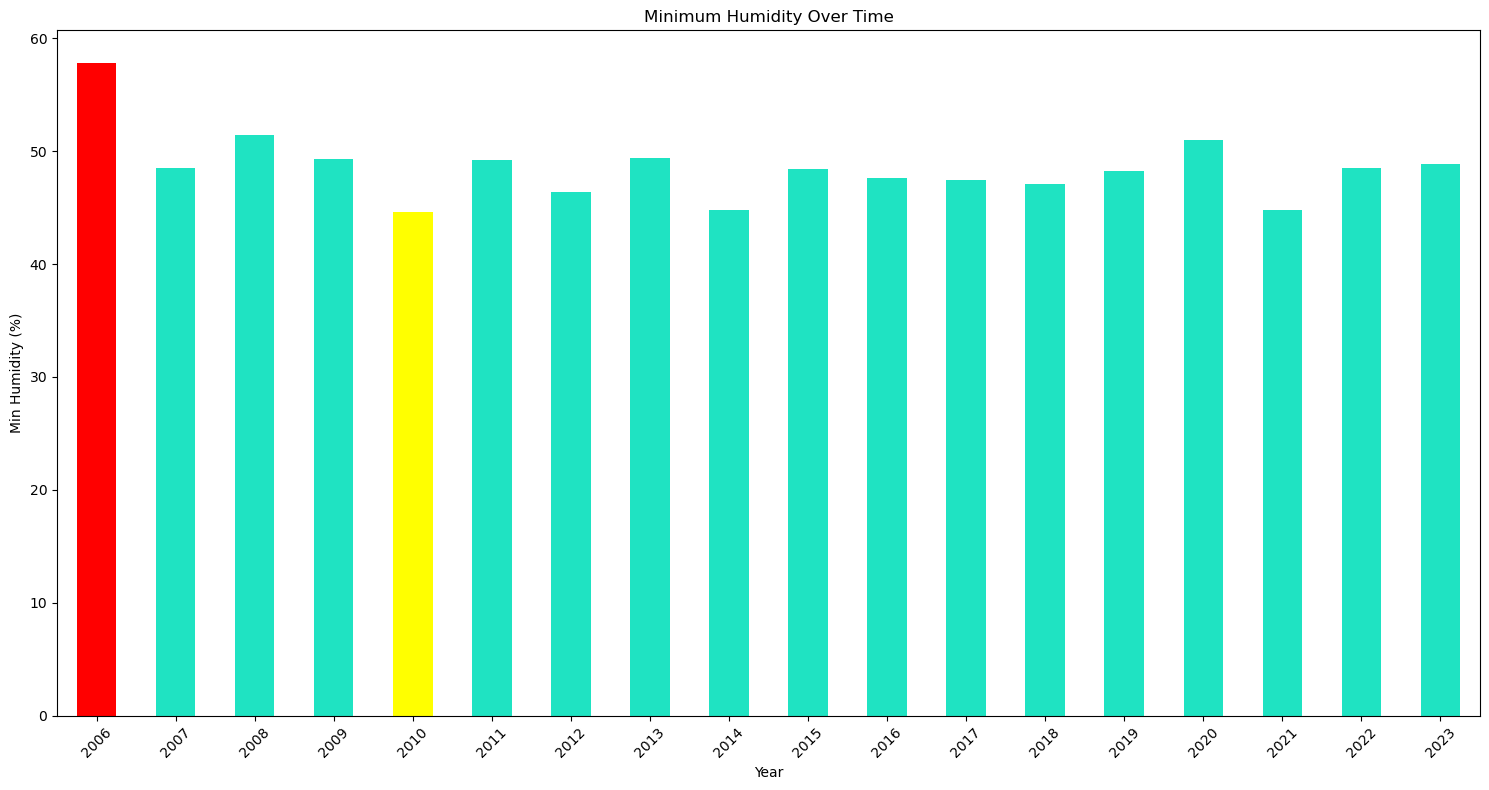

In [68]:

#minimum humidity Bar Chart 
hum = weather.groupby("year")["hum_min"].mean()
colors = ['#1FE3C2'] * len(hum)

# Fix highlight
colors[hum.index.get_loc(hum.idxmin())] = 'yellow'
colors[hum.index.get_loc(hum.idxmax())] = 'red'

hum.plot(kind="bar", color=colors, figsize=(15, 8))
plt.title("Minimum Humidity Over Time")
plt.xlabel("Year")
plt.ylabel("Min Humidity (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🌬️ Average wind speed changing across the years.

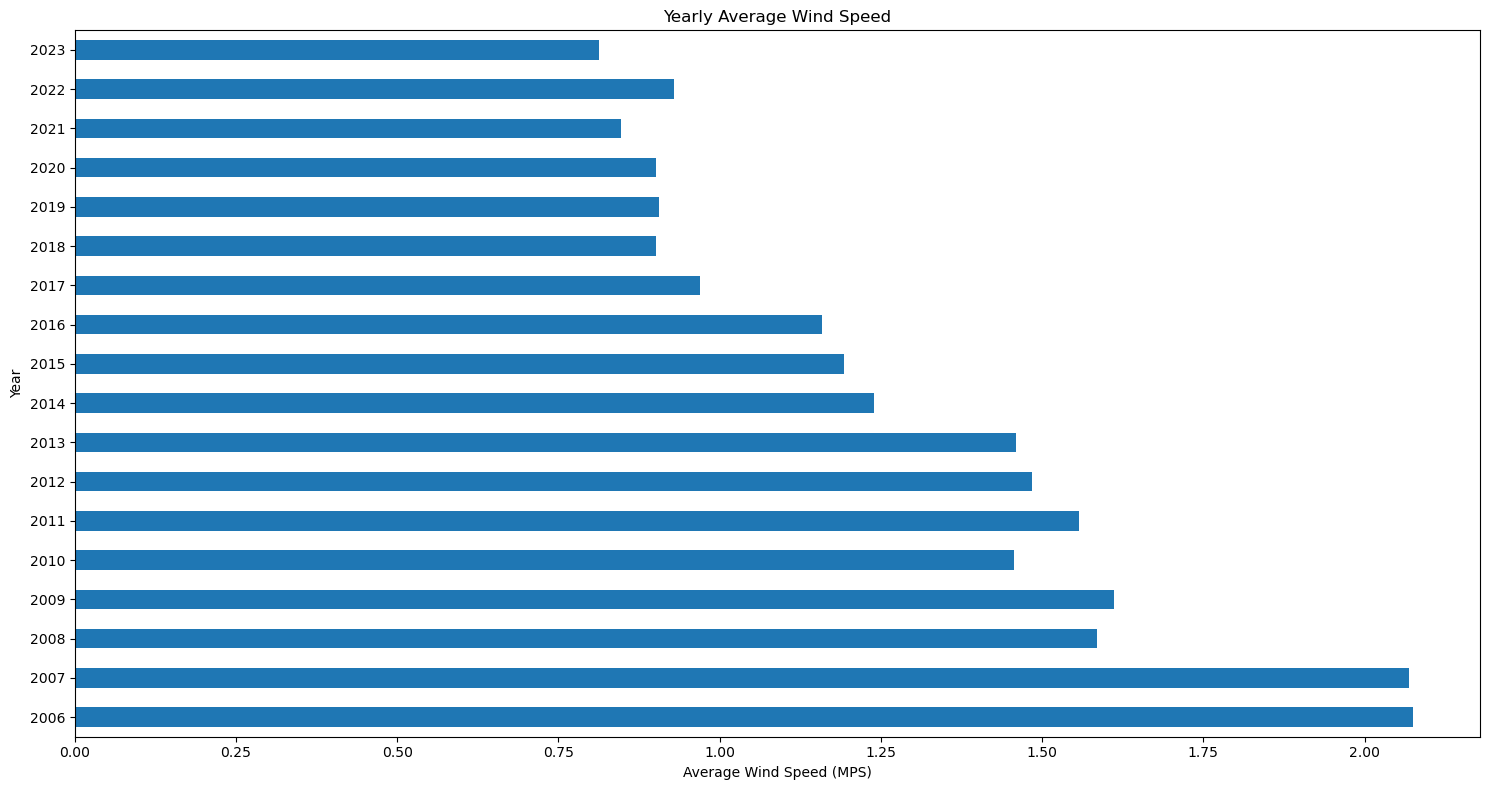

In [69]:
# TODO: average wind speed Horizontal Bar Chart
weather.groupby("year")["wind_avg"].mean().plot(kind="barh", figsize=(15,8))
plt.xlabel("Average Wind Speed (MPS)")
plt.ylabel("Year")
plt.title("Yearly Average Wind Speed")  
plt.tight_layout()

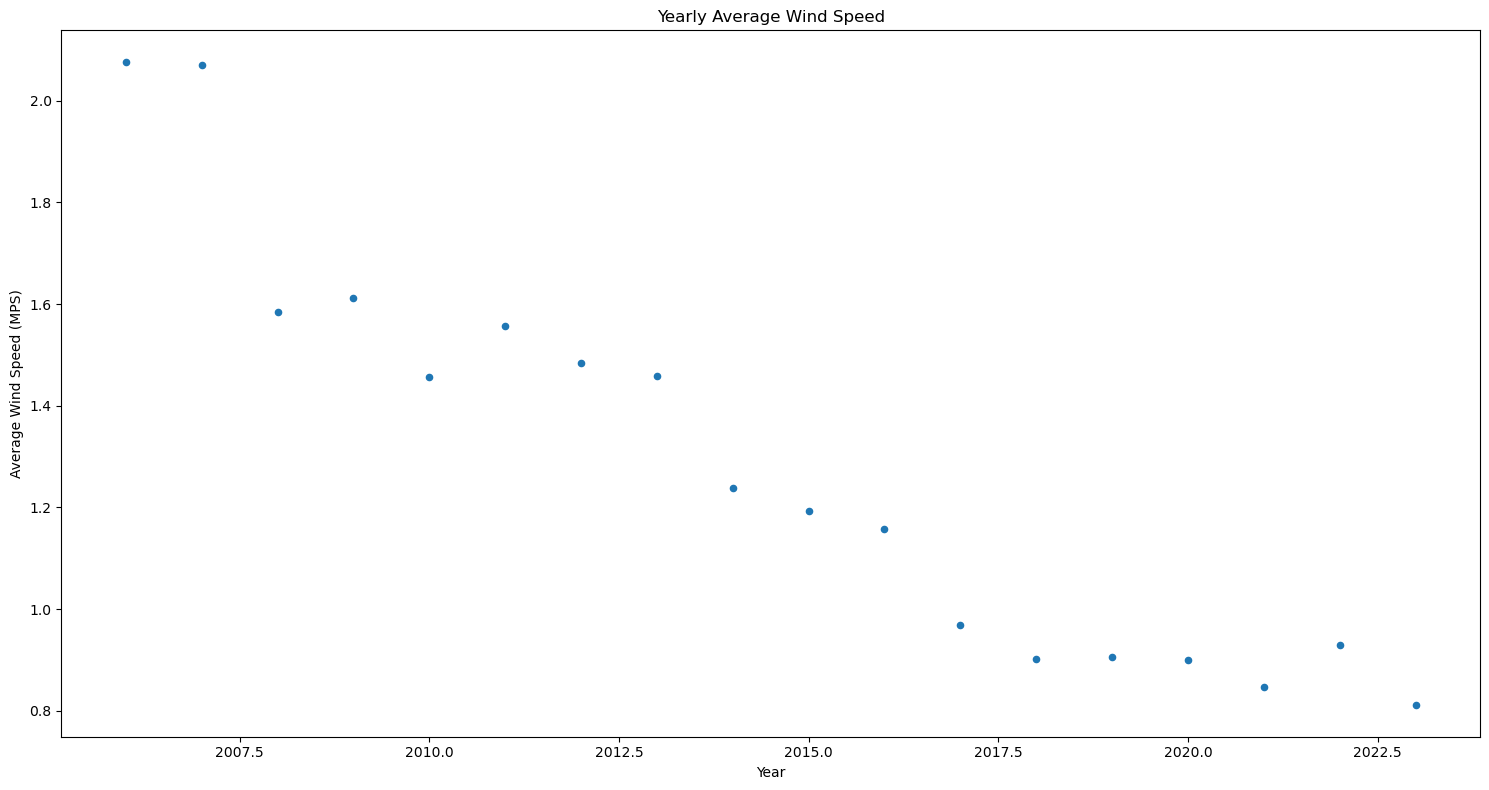

In [ ]:
weather.plot.scatter(x="year", y="wind_avg", figsize=(15, 8))
plt.xlabel("Year")
plt.ylabel("Average Wind Speed (MPS)")
plt.title("Yearly Average Wind Speed")  
plt.tight_layout()

In [ ]:
weather["year"].corr(weather["wind_avg"]) #Pearson's correlation coefficinet is very high negatve 

np.float64(-0.9516285243842627)

## 🌧️ Which year had the highest maximum record rainfall?

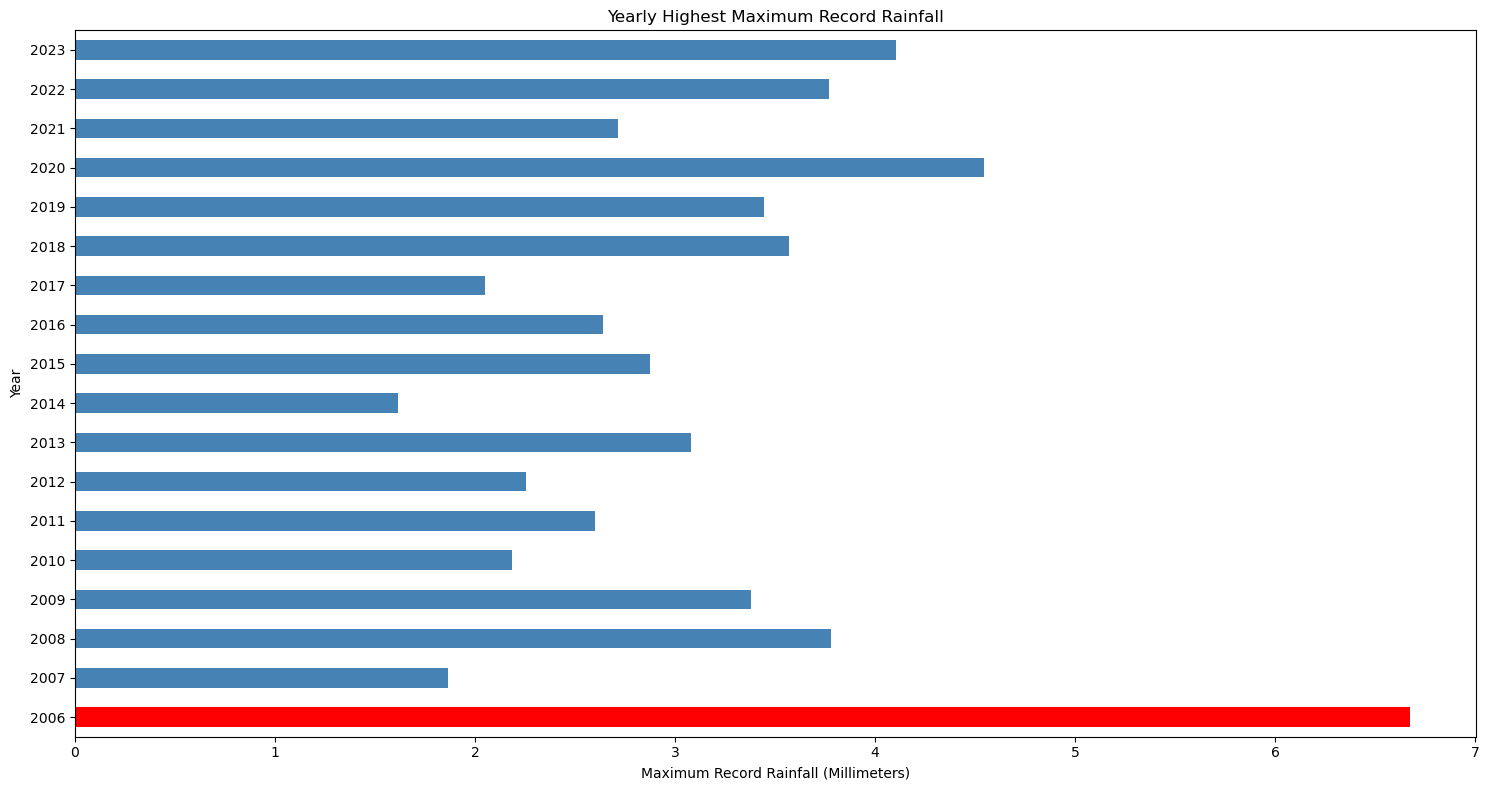

In [ ]:
# TODO: year with highest maximum record rainfall
rain = weather.groupby("year")["rain_max"].max()
rain.plot(kind="barh", figsize=(15,8), color=['red' if r == rain.max() else 'steelblue' for r in rain])
plt.xlabel("Maximum Record Rainfall (Millimeters)")
plt.ylabel("Year")
plt.title("Yearly Highest Maximum Record Rainfall")
plt.tight_layout()

In [ ]:
weather.groupby("year").rain_max.describe() #data frame confirms 2006 is the year with Maxium amount of rain.

#Should we remove NAN???

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2006,1.0,6.670968,NaN,6.670968,6.670968,6.670968,6.670968,6.670968
2007,1.0,1.866250,NaN,1.866250,1.866250,1.866250,1.866250,1.866250
2008,1.0,3.777049,NaN,3.777049,3.777049,3.777049,3.777049,3.777049
2009,1.0,3.380220,NaN,3.380220,3.380220,3.380220,3.380220,3.380220
2010,1.0,2.183516,NaN,2.183516,2.183516,2.183516,2.183516,2.183516
2011,1.0,2.601786,NaN,2.601786,2.601786,2.601786,2.601786,2.601786
2012,1.0,2.255738,NaN,2.255738,2.255738,2.255738,2.255738,2.255738
2013,1.0,3.079121,NaN,3.079121,3.079121,3.079121,3.079121,3.079121
2014,1.0,1.617582,NaN,1.617582,1.617582,1.617582,1.617582,1.617582


<Axes: xlabel='year', ylabel='rain_max'>

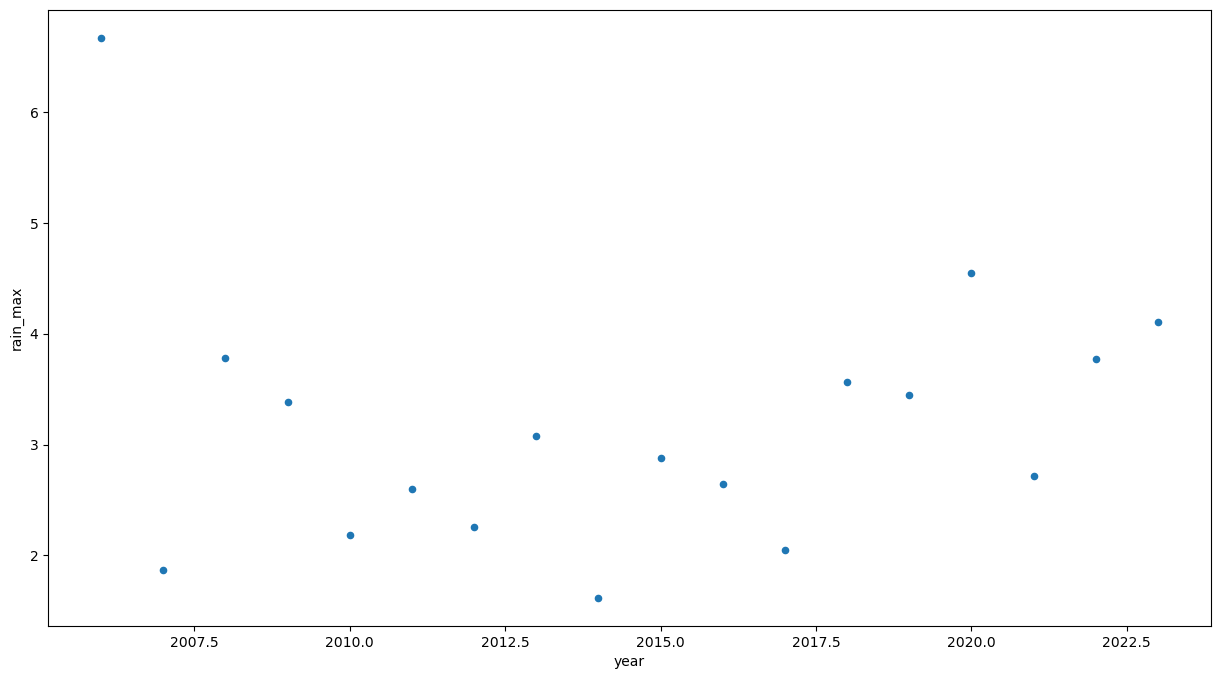

In [ ]:
weather.plot.scatter(x="year", y="rain_max", figsize=(15,8))

In [ ]:
weather["year"].corr(weather["rain_max"]) #Pearson's correlation coefficinet is very low 

np.float64(0.0046307990823462675)

## 🧠Bivariate Analysis

What is the relationship between max rain and max humidity? How strong is this relationship? Use pearson's correlation coefficient.
What is the relationship between average wind speed and average temperature? How strong is this relationship? Use pearson's correlation coefficient.

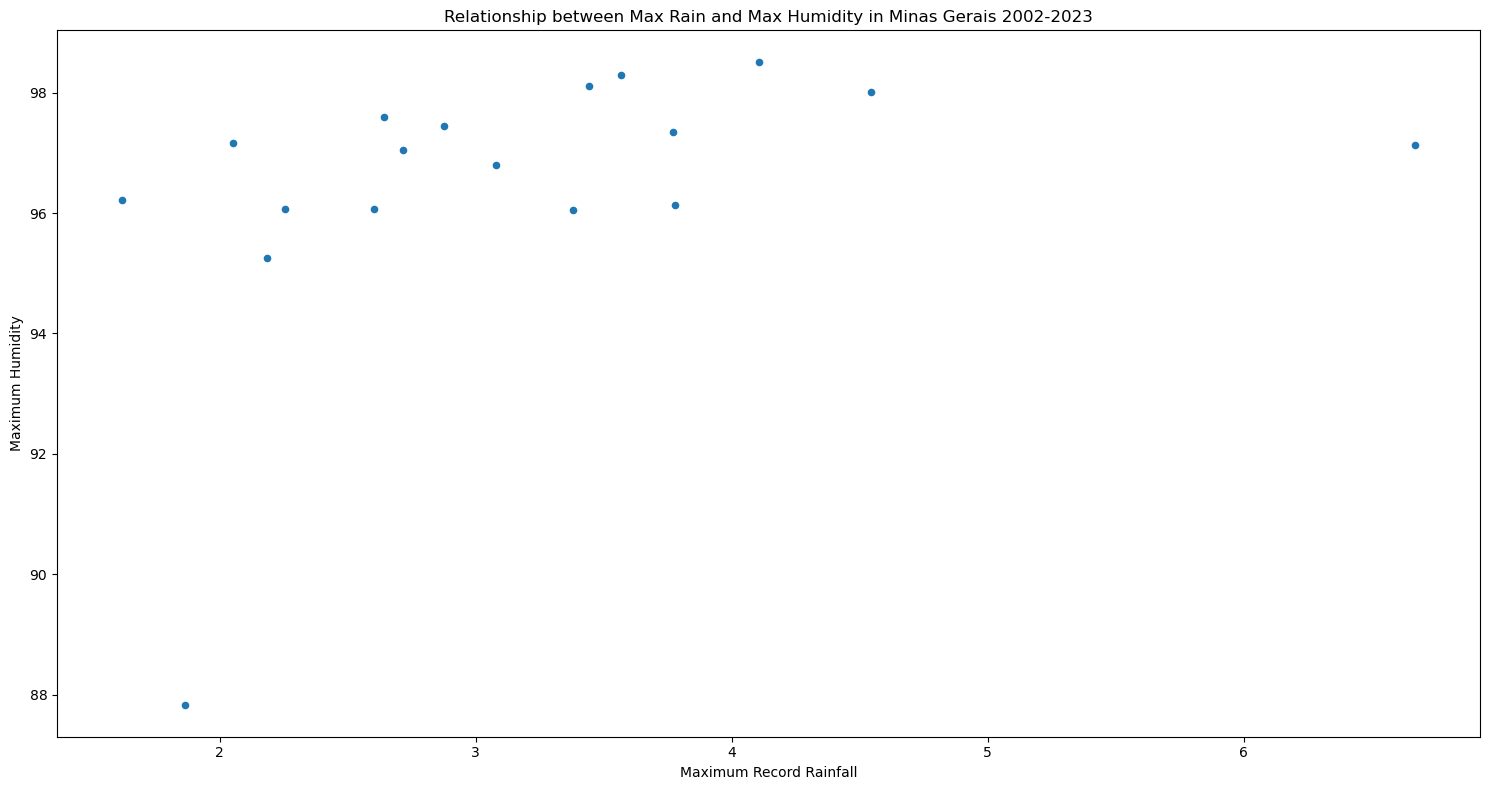

In [ ]:
weather.plot.scatter(x="rain_max",y="hum_max", figsize=(15, 8))

plt.xlabel("Maximum Record Rainfall")
plt.ylabel("Maximum Humidity")
plt.title("Relationship between Max Rain and Max Humidity in Minas Gerais 2002-2023")
plt.tight_layout()

In [ ]:
# Pearson's correlation coefficient
# Calculate the correlation between max-temperature and min-humidity
wind_temp_max_corr = pearsonr(weather['wind_avg'], weather['temp_max'])
print(f"Pearson's r: {wind_temp_max_corr[0]:.2f} and p-value: {wind_temp_max_corr[1]:.2e}")

Pearson's r: -0.72 and p-value: 7.09e-04


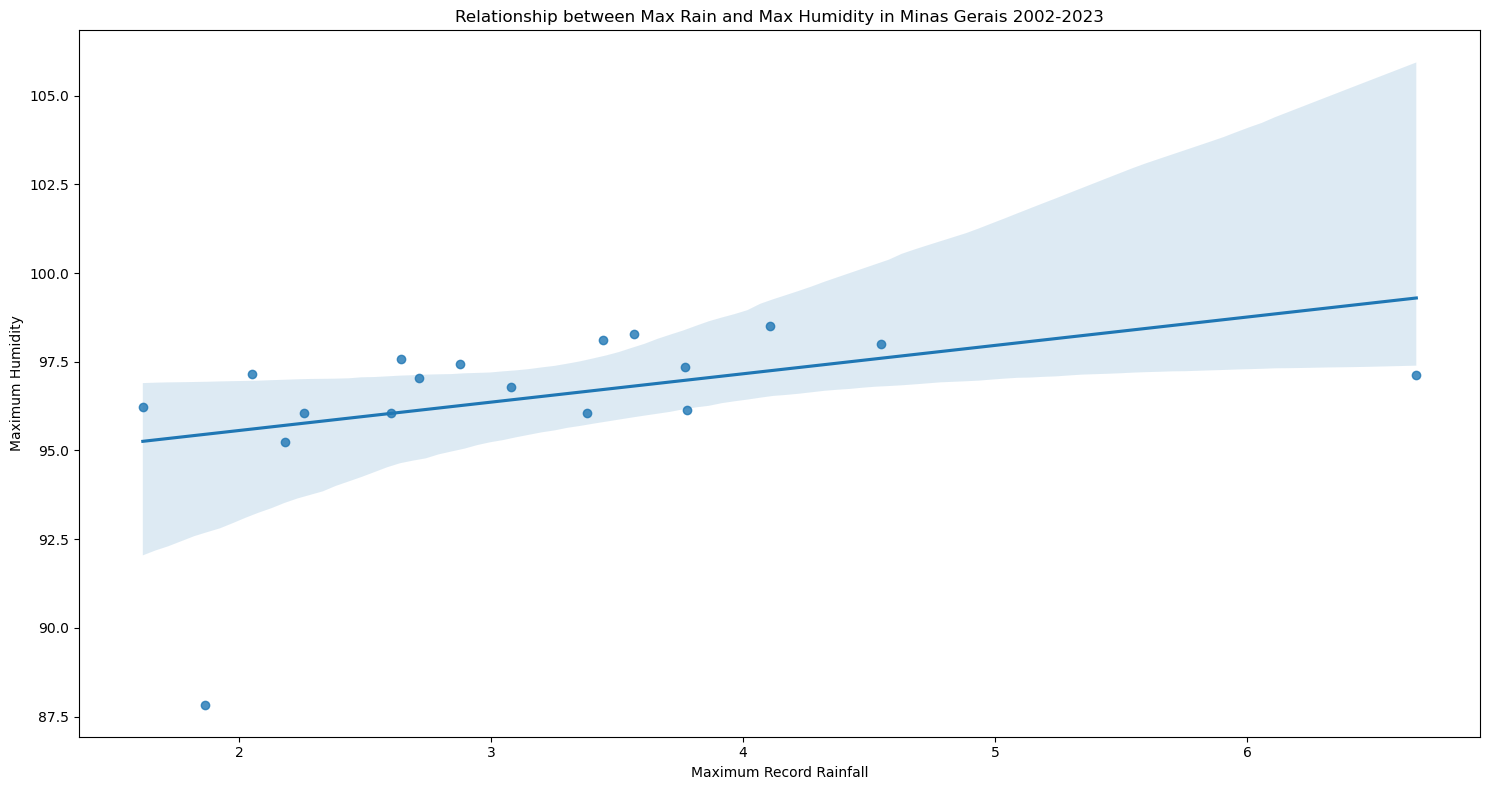

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=weather["rain_max"], y=weather["hum_max"])
plt.xlabel("Maximum Record Rainfall")
plt.ylabel("Maximum Humidity")
plt.title("Relationship between Max Rain and Max Humidity in Minas Gerais 2002-2023")
plt.tight_layout()

In [ ]:
weather["rain_max"].corr(weather["hum_max"]) #How strong is this relationship? Use pearson's correlation coefficient. relationship between max rain and max humidity

np.float64(0.40578216801444184)

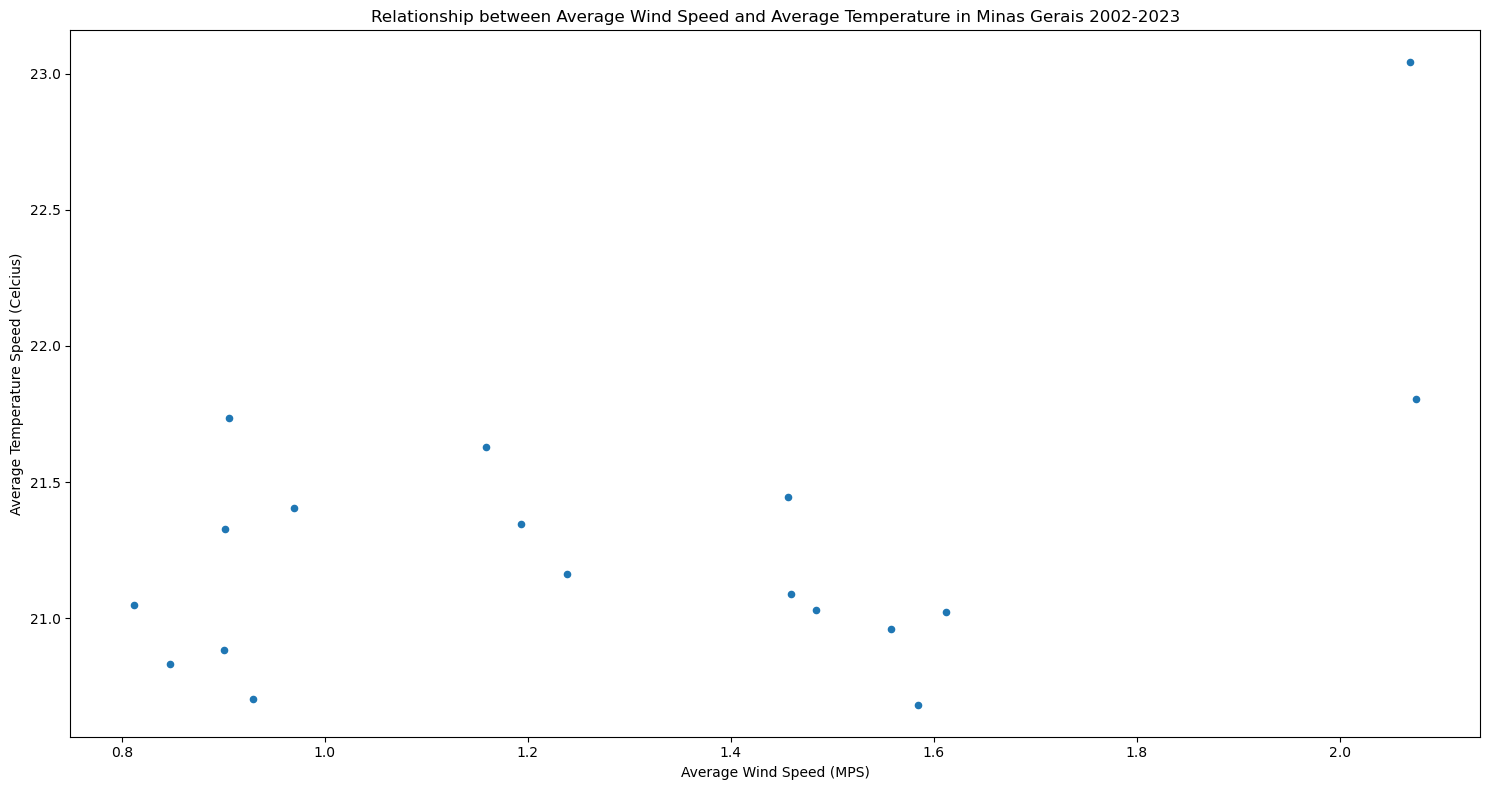

In [ ]:
weather.plot.scatter(x="wind_avg",y="temp_avg", figsize=(15, 8))
plt.xlabel("Average Wind Speed (MPS)")
plt.ylabel("Average Temperature Speed (Celcius)")
plt.title("Relationship between Average Wind Speed and Average Temperature in Minas Gerais 2002-2023")
plt.tight_layout()

In [73]:
weather["wind_avg"].corr(weather["temp_avg"]) #relationship between average wind speed and average temperature? How strong is this relationship? Use pearson's correlation coefficient.

np.float64(0.4765294973950928)

<Axes: xlabel='year', ylabel='temp_avg'>

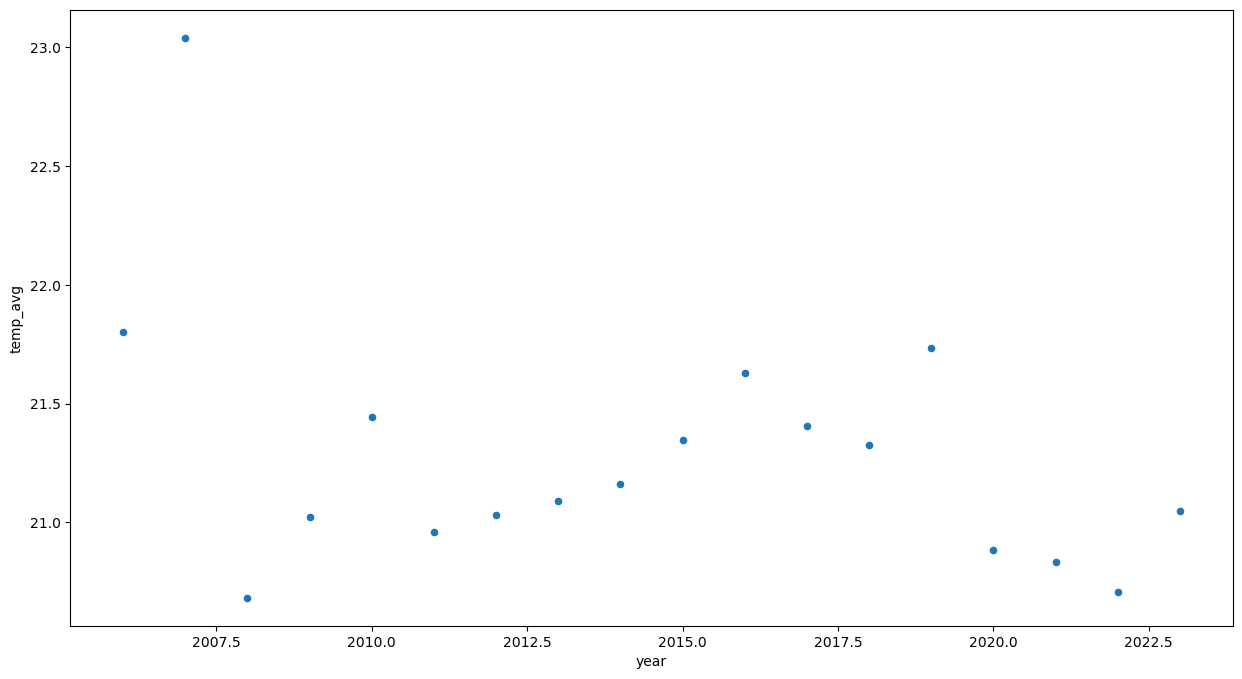

In [ ]:
weather.plot.scatter(x="year", y="temp_avg", figsize=(15,8))

#Can/Should we remove floats?


In [ ]:
weather.pivot_table(
    values=["temp_avg", "wind_avg", "hum_max","rain_max"],
    index="year",
    aggfunc="mean"
)

,hum_max,rain_max,temp_avg,wind_avg
year,,,,
2006,97.129032,6.670968,21.803087,2.075207
2007,87.837500,1.866250,23.040999,2.069605
2008,96.136612,3.777049,20.682400,1.584408
2009,96.054945,3.380220,21.023802,1.611746
2010,95.247253,2.183516,21.444293,1.455907
2011,96.060440,2.601786,20.959536,1.557709
2012,96.060109,2.255738,21.030624,1.483515
2013,96.802198,3.079121,21.088660,1.459356
2014,96.214286,1.617582,21.163462,1.238874


## 🌧️ max rain and max humidity
How strong is this relationship? Use pearson's correlation coefficient.

In [22]:
weather[["rain_max", "hum_max"]].corr()

,rain_max,hum_max
rain_max,1.000000,0.405782
hum_max,0.405782,1.000000


In [23]:
weather["rain_max"].corr(weather["hum_max"])

np.float64(0.40578216801444184)

<Axes: xlabel='rain_max', ylabel='hum_max'>

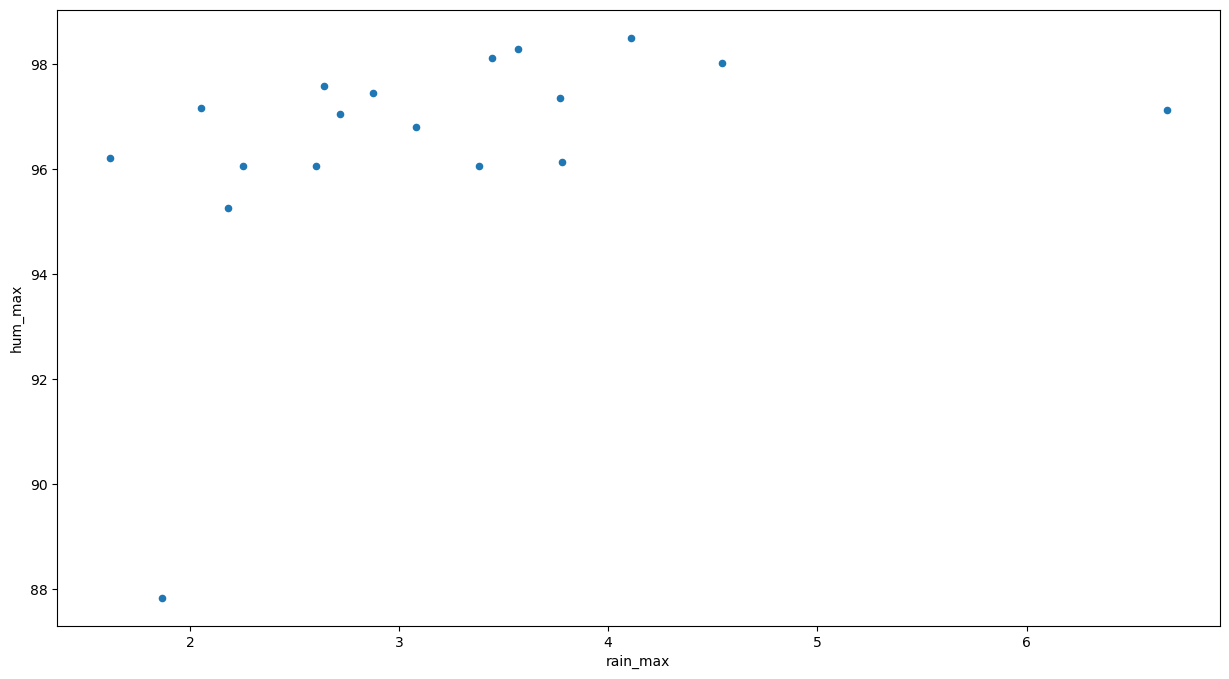

In [21]:
weather.plot.scatter(x="rain_max", y="hum_max", figsize=(15,8) )

<Axes: xlabel='rain_max', ylabel='hum_max'>

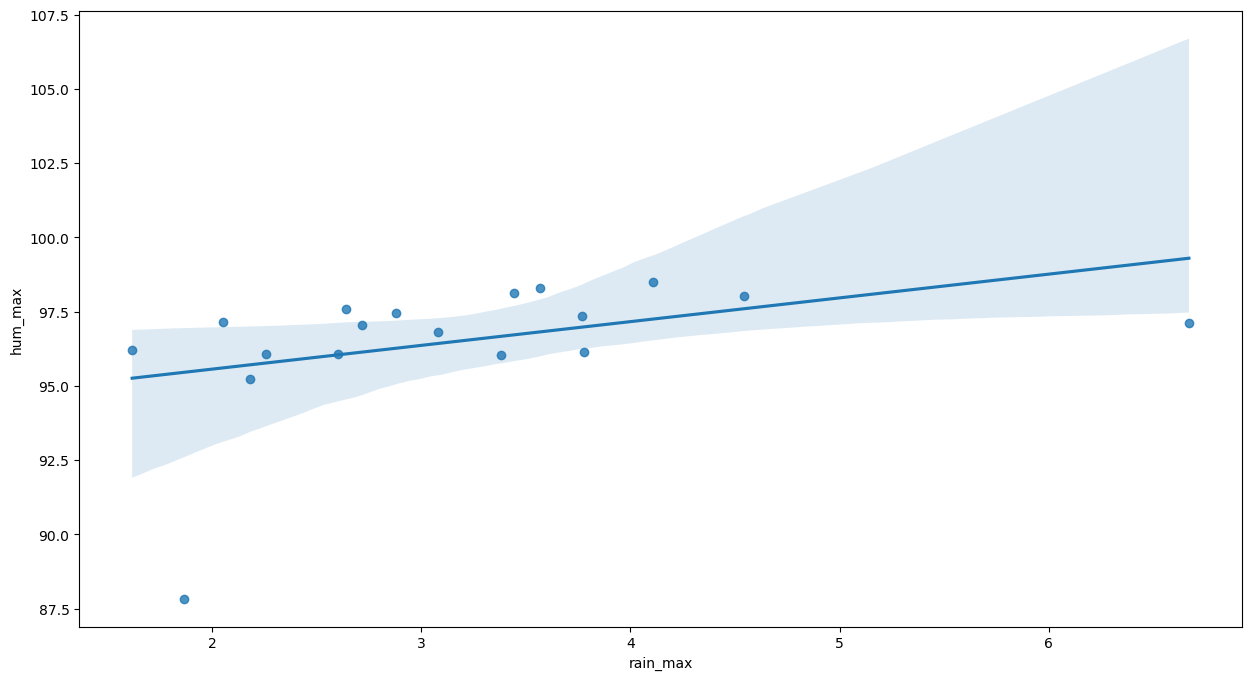

In [16]:
plt.figure(figsize=(15,8))
sns.regplot(x=weather["rain_max"], y=weather["hum_max"])

In [ ]:
# Calculate the correlation between Average Wind and Average Temperature.
rain_hum_max_corr = pearsonr(weather['rain_max'], weather['hum_max'])
print(f"Pearson's r: {rain_hum_max_corr[0]:.2f} and p-value: {rain_hum_max_corr[1]:.2e}")

Pearson's r: 0.41 and p-value: 9.48e-02


<Axes: xlabel='temp_avg', ylabel='wind_avg'>

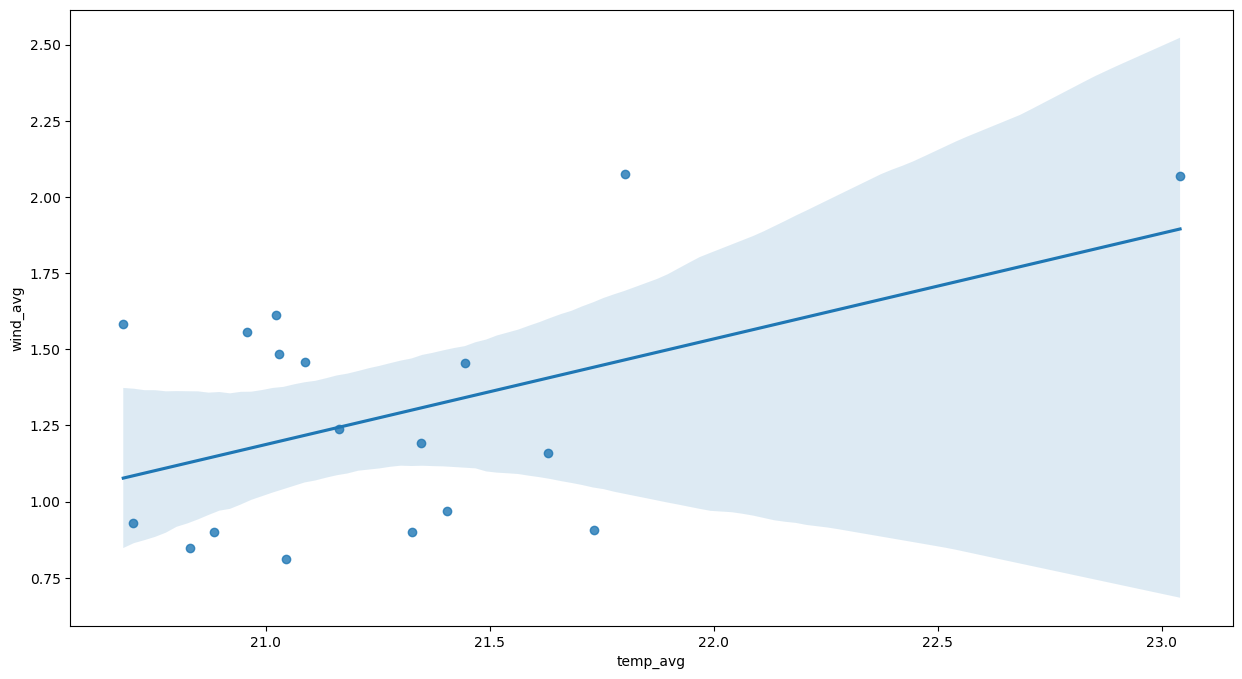

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=weather["temp_avg"], y=weather["wind_avg"])


In [ ]:
weather[["rain_max", "hum_max"]].corr()

,rain_max,hum_max
rain_max,1.000000,0.405782
hum_max,0.405782,1.000000


In [ ]:
# Relationship between maximum humidity Answer that question How strong is the relationship?
r_value, p_value = pearsonr(x=weather['hum_max'], y=weather['rain_max'])
print(f"Pearson correlation coefficient: {r_value:.2f}")
print(f"P-value: {p_value:.2f}")

Pearson correlation coefficient: 0.41
P-value: 0.09


In [ ]:
weather["rain_max"].corr(weather["hum_max"])

np.float64(0.40578216801444184)

## 💨  wind speed and average temperature
What is the relationship between average wind speed and average temperature? How strong is this relationship? Use pearson's correlation coefficient.

In [24]:
weather[["wind_avg", "temp_avg"]].corr()

,wind_avg,temp_avg
wind_avg,1.000000,0.476529
temp_avg,0.476529,1.000000


In [28]:
weather["wind_avg"].corr(weather["temp_avg"])

np.float64(0.4765294973950928)

In [29]:
weather["temp_avg"].corr(weather["wind_avg"])

np.float64(0.47652949739509276)

<Axes: ylabel='year'>

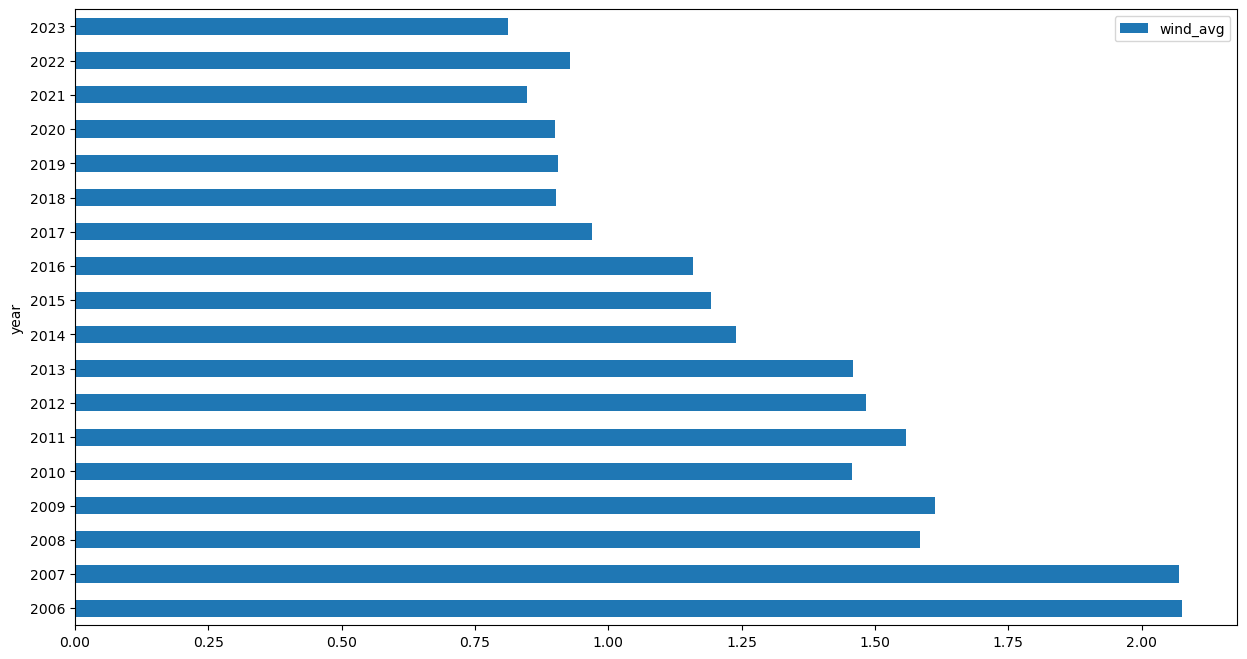

In [ ]:
weather.plot.barh(x="year", y="wind_avg", figsize=(15, 8))

<Axes: ylabel='year'>

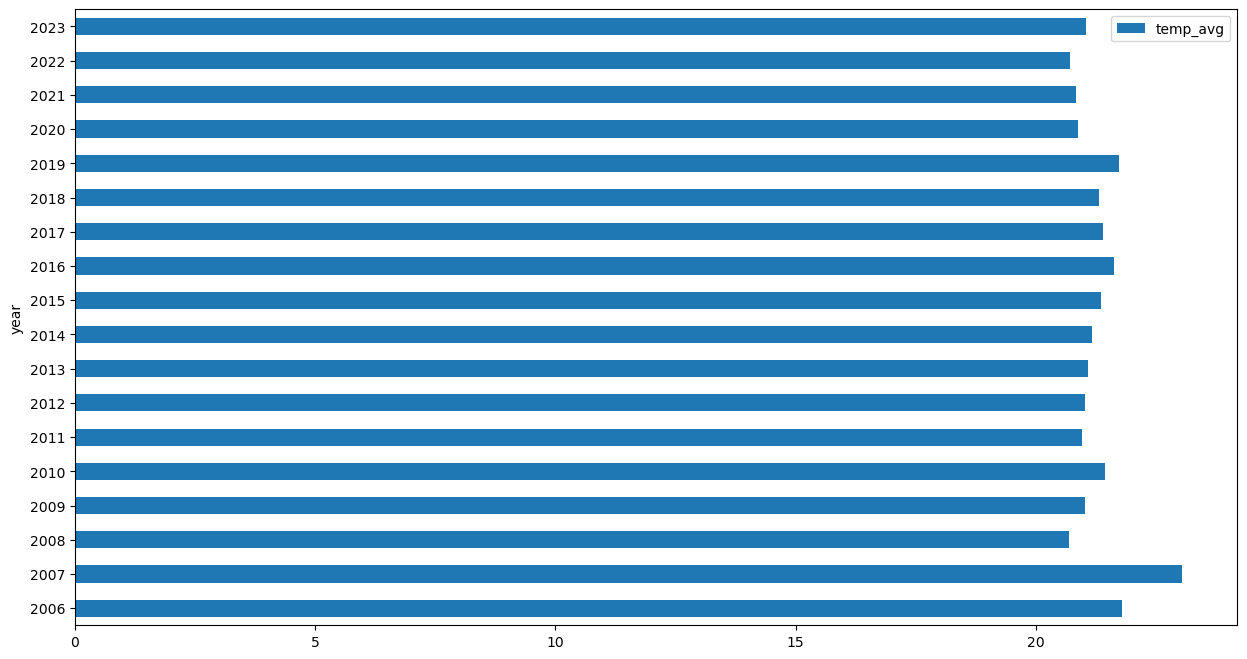

In [26]:
weather.plot.barh(x="year", y="temp_avg", figsize=(15, 8))

<Axes: xlabel='wind_avg', ylabel='temp_avg'>

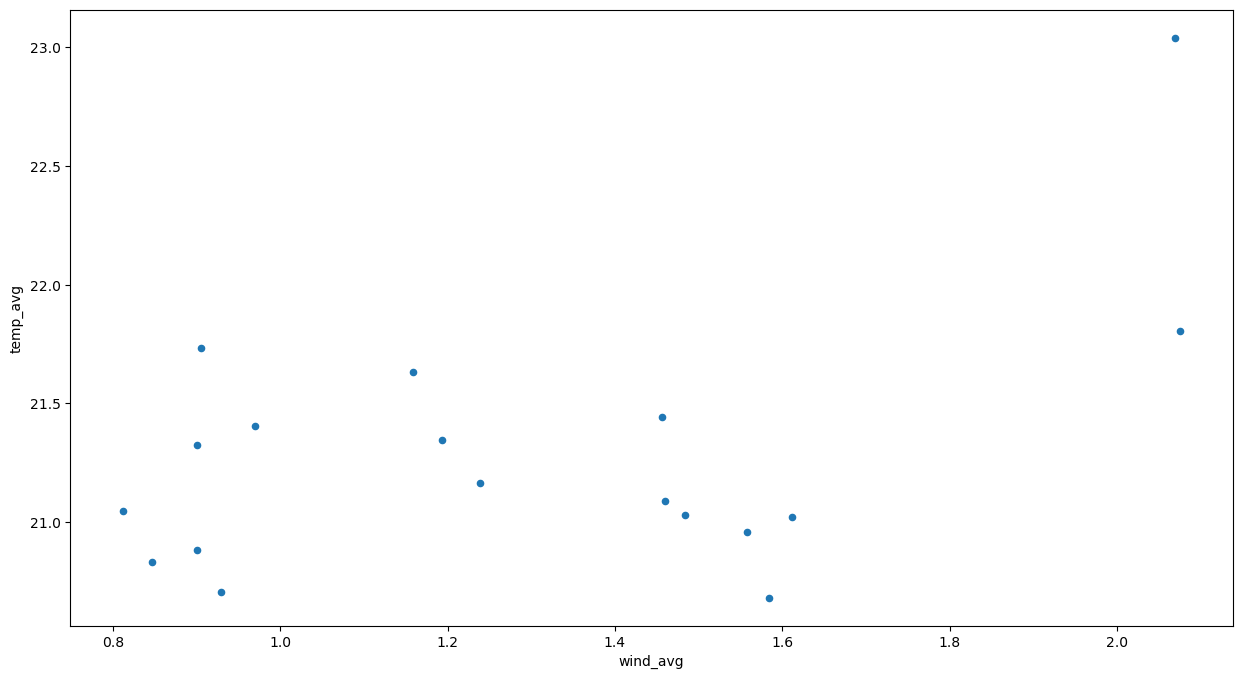

In [27]:
weather.plot.scatter(x="wind_avg", y="temp_avg", figsize=(15,8))

<Axes: xlabel='temp_avg', ylabel='wind_avg'>

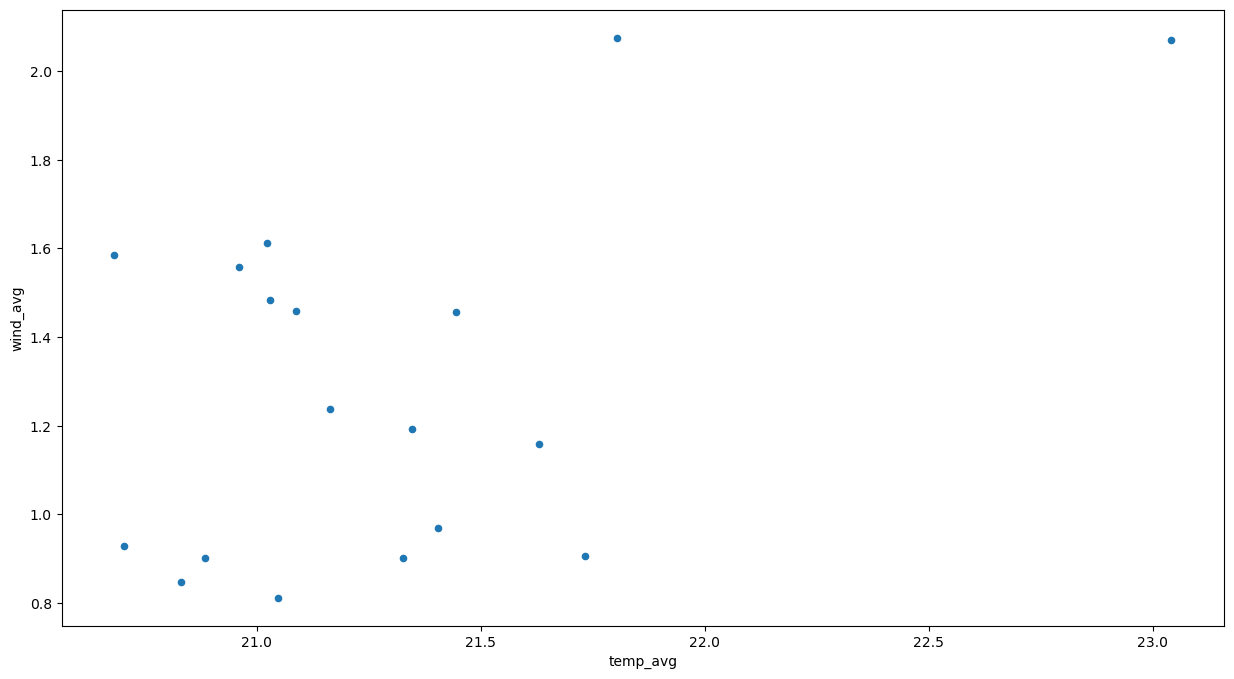

In [25]:
weather.plot.scatter(y="wind_avg", x="temp_avg", figsize=(15,8))

<Axes: xlabel='temp_avg', ylabel='wind_avg'>

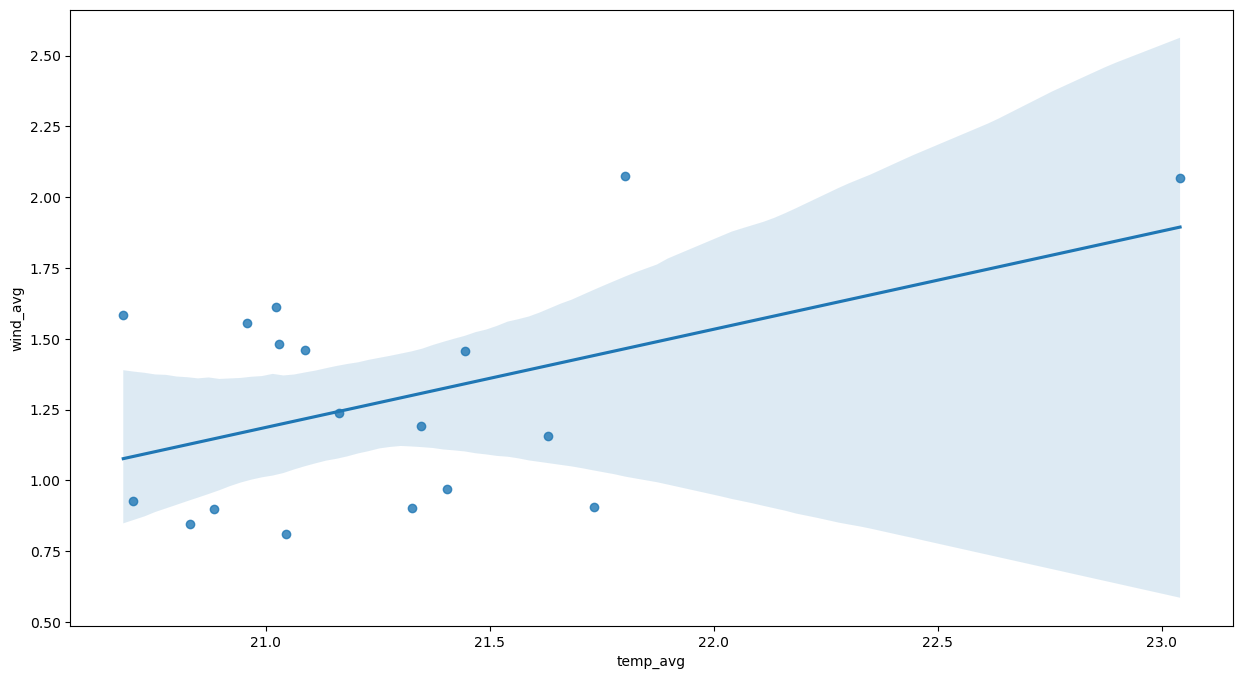

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=weather["temp_avg"], y=weather["wind_avg"])

In [79]:
# Calculate the correlation between Average Wind and Average Temperature.
temp_avg_wind_avg_corr = pearsonr(weather['wind_avg'], weather['temp_avg'])
print(f"Pearson's r: {temp_avg_wind_avg_corr[0]:.2f} and p-value: {temp_avg_wind_avg_corr[1]:.2e}")

Pearson's r: 0.48 and p-value: 4.56e-02


<Axes: xlabel='wind_avg', ylabel='year'>

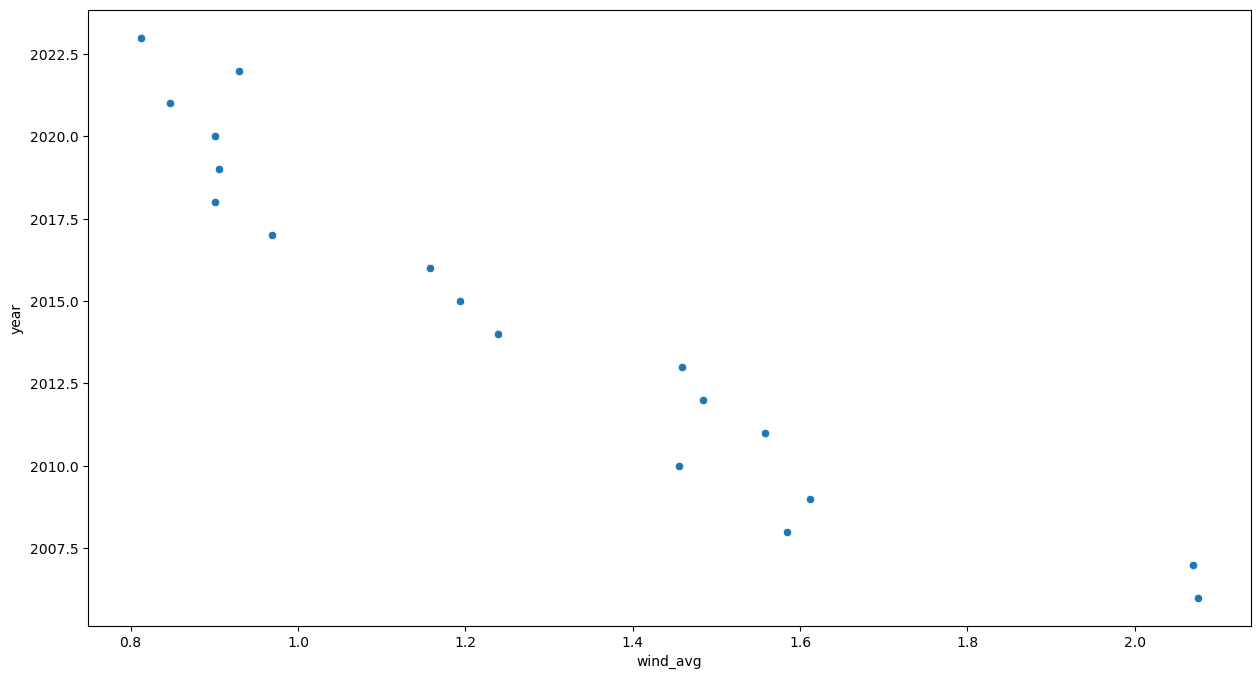

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=weather["wind_avg"], y=weather["year"])

<Axes: xlabel='year', ylabel='wind_max'>

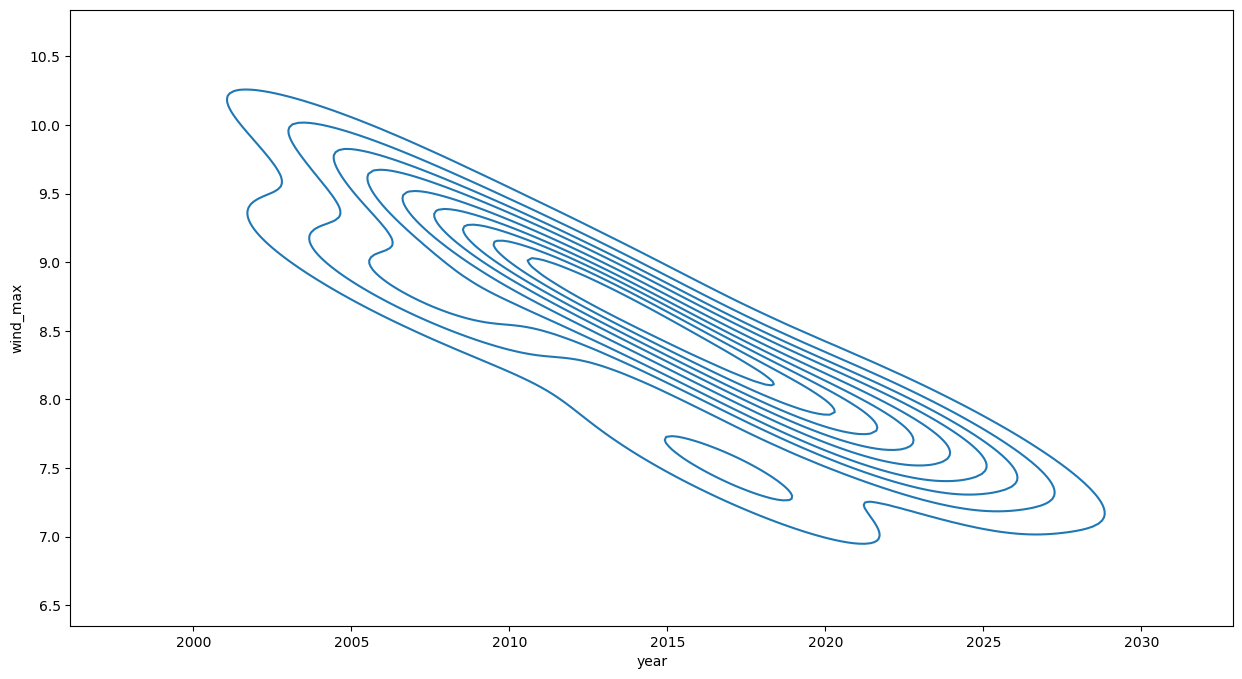

In [ ]:
plt.figure(figsize=(15,8))
sns.kdeplot(x=weather["year"], y=weather["wind_max"])

c:\Users\adiaz\anaconda3\envs\ds\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


<Axes: xlabel='year', ylabel='rain_max'>

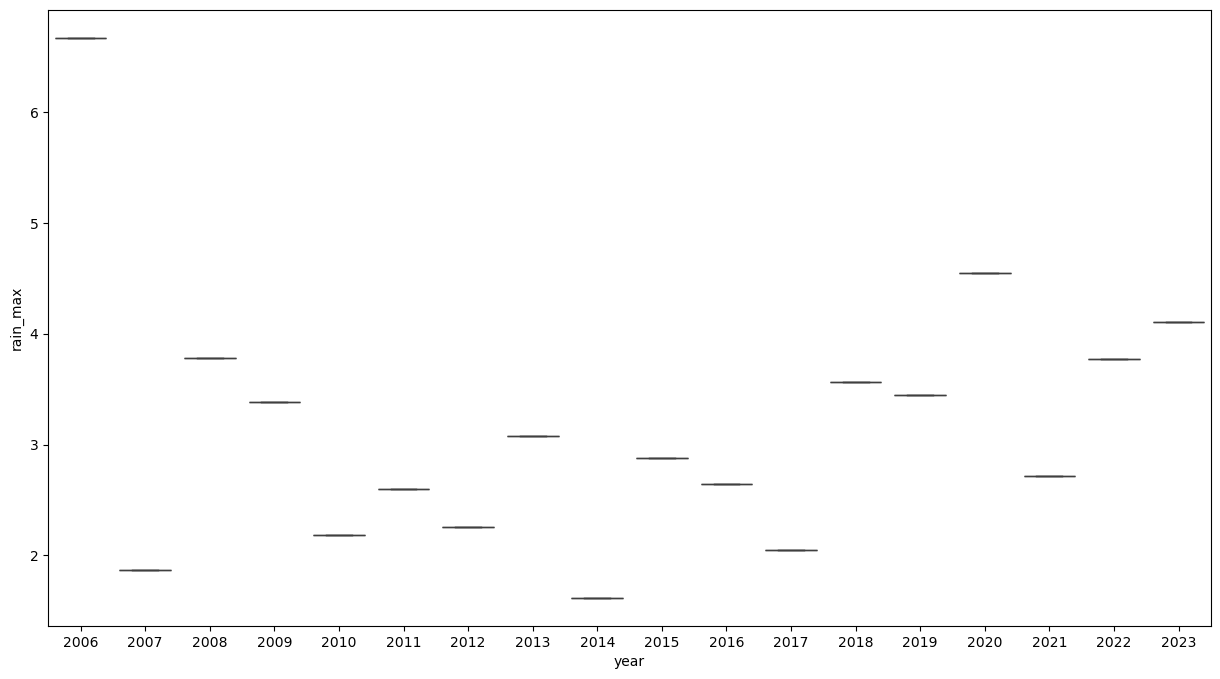

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=weather, x="year", y="rain_max")

## 🧠 Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context. 

## How is average temperature changing across the years for Minas Gerais? Is this increasing or decreasing?

As evidenced in the analysis in our varying univariate charts, the weather in Minas Gerais has been relatively stable acorss the years, with small fluctuations in 2007 and then again between 2018 and 2019. The record high and low are 
- Highest: **2007** at **23.04 °C**  
- Lowest: **2008** at **20.68 °C** 

However, though there have been some instances of increasing then decreasing temperature, overall there does not seem to be a strong change in temperatures trends over the years, during coffee-growing months of Minas Gerais, from January through May.
 
Therefore, based on our limited data set, I have concluded that there is **no strong increasing or decreasing trend** over the years.

## How is minimum humidity changing across the years for Minas Gerais? Is this increasing or decreasing?

According to our figures, humidity fluctuates noticeably from year to year, with some noticeable low points. However keep in mind that we are only considering the months of January through May, so in order to get a true picture of the humidity changes over years time, we must add more to stats to our data set. 

That stated, around 2012, 2015, and 2021, there are lower trends in humidity. According to our univariate charts, humidity values seem somewhat stable and fluctuate within a minimally nocitecable range. Overall, there does not appear to be any strong increasing or decreasing trend across all years. The record low and high are -

- Lowest: **2014** at **44.82%**  
- Highest: **2006** at **57.81%** 

So, without a clear long-term increase or decrease during the coffe=growing months in Minas Gerais. It appears that there is a **moderate decreasing trend** from 2006 to around 2014, with some recovery in later years.


## How is average wind speed changing across the years for Minas Gerais? Is this increasing or decreasing?

Accodring to our bar chart, there a decreasing trend in wind speed over time. The Minas Gerais wind speed was highest in 2006–2007 and has consistently declined through 2023. Average wind speed is clearly decreasing over the years during the coffee beraing months of January through May and it is most apparent in our univariate scatter plot chart.

## Which year had the highest maximum record rainfall?

The year 2006 had the highest maximum rainfall, which stood out significantly. I also expected more year-to-year variability in average temperatures, but it remained fairly consistent.

## What is the relationship between max rain and max humidity? How *strong* is this relationship? Use pearson's correlation coefficient.
The relationship between maximum rainfall and maximum humidity is somwhat positive (r = 0.41), but not statistically significant (p = 0.0948). This means there appears to be a trend, but we don’t have strong enough evidence to confidently say the relationship isn't due to chance.

Exploring and analyzing the relationship between rain_max and hum_max using Pearson’s Correlation reults are below:

**Pearson’s correlation coefficient (r) = 0.41**

This indicates a moderate positive correlation, meaning that as maximum rainfall increases, maximum humidity also tends to increase. 

However, the results of the P-value indicate the significance of the correlation below:

**p-value = 0.0948**

Since the p-value is greater than 0.05, the result is not statistically significant.

Therefore, we cannot confidently conclude that the observed correlation is observed correlation is meaningful, or not due to random variation in the data.

## What is the relationship between average wind speed and average temperature? How *strong* is this relationship? Use pearson's correlation coefficient.

I noticed that average wind speed has been decreasing over time. Average temperature shows some fluctuations but may be slightly increasing overall. Humidity levels also vary but appear to stay within a certain range. Positive but not strong, there is a slight increase.

The relationship between average wind speed and average temperature is moderately positive, with a Pearson’s correlation coefficient (r) of 0.48. This means that as average wind speed increases, average temperature tends to increase as well.

The p-value is 0.0456, which is less than 0.05, indicating that the correlation is statistically significant.

Conclusion:
There is a moderate and statistically significant positive relationship between average wind speed and average temperature in this dataset. We can confidently say this correlation is unlikely to be due to random chance.


